### Titanic Dataset Analysis and Logistic Regression Modeling

The **Titanic passengers dataset** is available in public repositories, such as [Kaggle Titanic Competition](https://www.kaggle.com/competitions/titanic/data).
The dataset contains information about passengers, such as:

- Age
- Gender
- Ticket class
- Number of siblings/spouses aboard
- Number of parents/children aboard
- Ticket fare
- And more.

---

### 📌 Task Steps

1. **Download the data** from the repository.
2. **Load the data** into a Python environment and preprocess it to prepare for analysis.
3. **Explore the data** to understand the distribution of variables and relationships between them.
4. **Preprocess the data** by:
   - Encoding categorical variables
   - Filling in missing values
   - And other necessary transformations
5. **Split the dataset** into training and test sets.
6. **Create and train a logistic regression model.**
7. **Evaluate the model's performance** on the test set.
8. **Use the model to predict** the survival of new passengers.

---

### 🔍 Additional Task

**Analyze the behavior of the model** built in the previous task with respect to different values of the following hyperparameters discussed in this video:

- `C` (Inverse of regularization strength)
- `penalty` (Regularization type)
- `solver` (Optimization algorithm)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

sns.set(style="whitegrid")

# Load dataset
data_path = 'data/titanic/train.csv'
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

## 2. Data overview and visualization


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

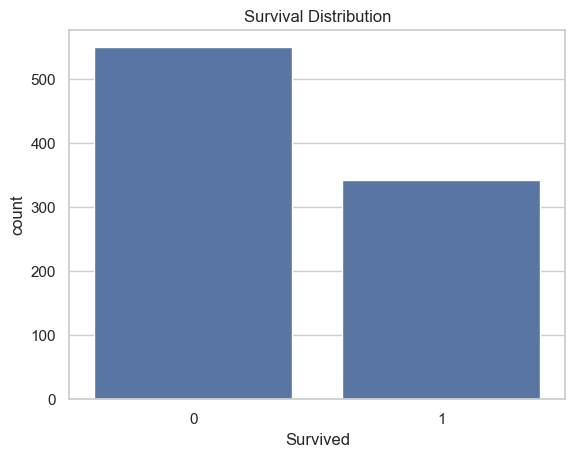

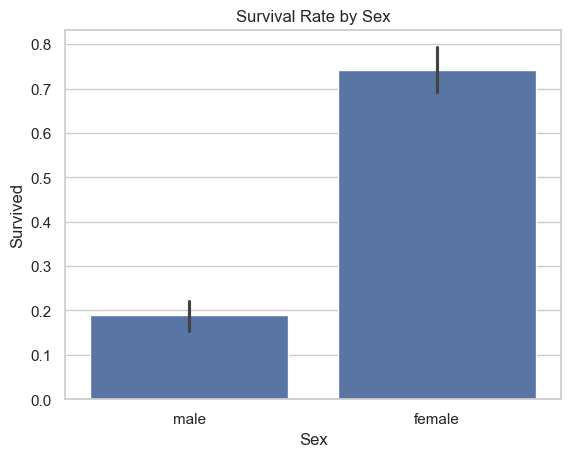

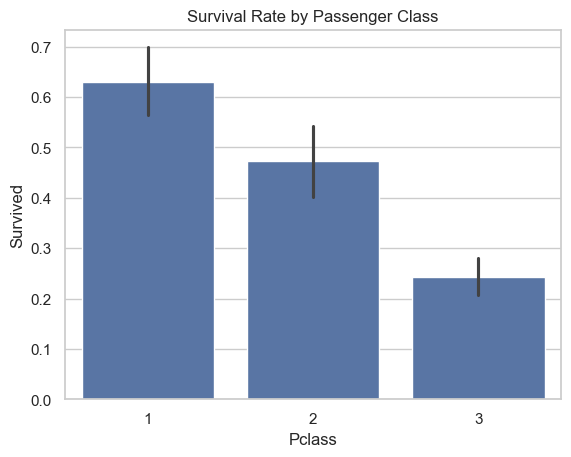

In [9]:
print(df.info())
print(df.describe())

# Survival distribution
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

# Survival by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


---

## 3. Data preprocessing


In [10]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Check missing data
print(df[features].isnull().sum())

numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']
numeric_transformer = SimpleImputer(strategy='median')

categorical_features = ['Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = df[features]
y = df[target]

X_preprocessed = preprocessor.fit_transform(X)


Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


---

## 4. Train-test split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)


---

## 5. Train logistic regression model


In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

---

## 7. Predict survival for new passengers


In [13]:
new_passengers = pd.DataFrame({
    'Pclass': [3, 1],
    'Sex': ['male', 'female'],
    'Age': [25, 38],
    'SibSp': [0, 1],
    'Parch': [0, 0],
    'Fare': [7.25, 71.2833],
    'Embarked': ['S', 'C']
})

new_passengers_preprocessed = preprocessor.transform(new_passengers)
preds = model.predict(new_passengers_preprocessed)

for i, pred in enumerate(preds):
    print(f"Passenger {i+1} prediction: {'Survived' if pred == 1 else 'Did not survive'}")


Passenger 1 prediction: Did not survive
Passenger 2 prediction: Survived


---

## 8. Hyperparameter analysis (C, penalty, solver)


Dataset shape: (891, 12)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validated accuracy: 0.7991135624938442

Test accuracy: 0.7932960893854749

Confusion Matrix:
 [[91 14]
 [23 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



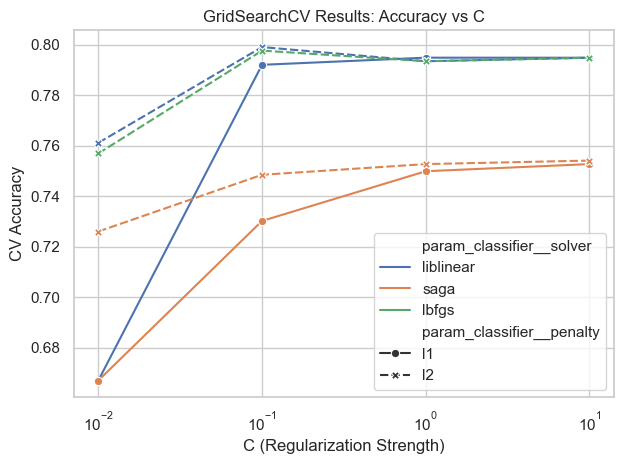

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

sns.set(style="whitegrid")

# Load dataset
data_path = 'data/titanic/train.csv'
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
df.head()

# Select useful columns and drop rows with missing target
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df.dropna(subset=['Survived'], inplace=True)

# Split into X and y
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = SimpleImputer(strategy='median')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Build pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Param grid (only valid combinations)
param_grid = [
    {
        'classifier__penalty': ['l1'],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga']
    },
    {
        'classifier__penalty': ['l2'],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga', 'lbfgs']
    }
]

# Grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Evaluation
print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

y_pred = grid.predict(X_test)
print("\nTest accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Results plot
cv_results = pd.DataFrame(grid.cv_results_)
sns.lineplot(data=cv_results, x='param_classifier__C', y='mean_test_score',
             hue='param_classifier__solver', style='param_classifier__penalty', markers=True)
plt.xscale('log')
plt.title('GridSearchCV Results: Accuracy vs C')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('CV Accuracy')
plt.tight_layout()
plt.show()
